# TITLE:
## Exploring Machine Learning Approaches to Estimate Calories Burned


# Problem Statement:

Accurately predicting calories burned during physical activities is crucial for fitness tracking and health monitoring. This project aims to develop machine learning models that can predict calorie burn based on factors such as activity type, duration, and heart rate. Furthermore, we performed clustering techniques to categorize individuals into distinct health risk groups. The objective is to compare the performance of these models and choose the best among them.


<h1>DATA SET :</h1>
<h4><a href="https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset">https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset</a></h4>


# Selected Models:

1. Linear Regression 
2. Random Forest 
3. XGBoost Regressor 
4. Neural Network
5. K-Means Clustering


# Evaluation Criteria: 
1. MSE (Mean Squared Error)
2. MAE (Mean Absolute Error)
3. RMSE (Root Mean Squared Error)
4. R squred Error 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("gym.csv")

In [3]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [5]:
# Check how many duplicate rows exist
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [6]:
df['Workout_Type'] = df['Workout_Type'].astype("string")
df['Gender'] = df['Gender'].astype("string")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    string 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    string 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [8]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [9]:
df.describe(include=['string'])


,Gender,Workout_Type
count,973,973
unique,2,4
top,Male,Strength
freq,511,258


# Outlier Detection using Box Plot

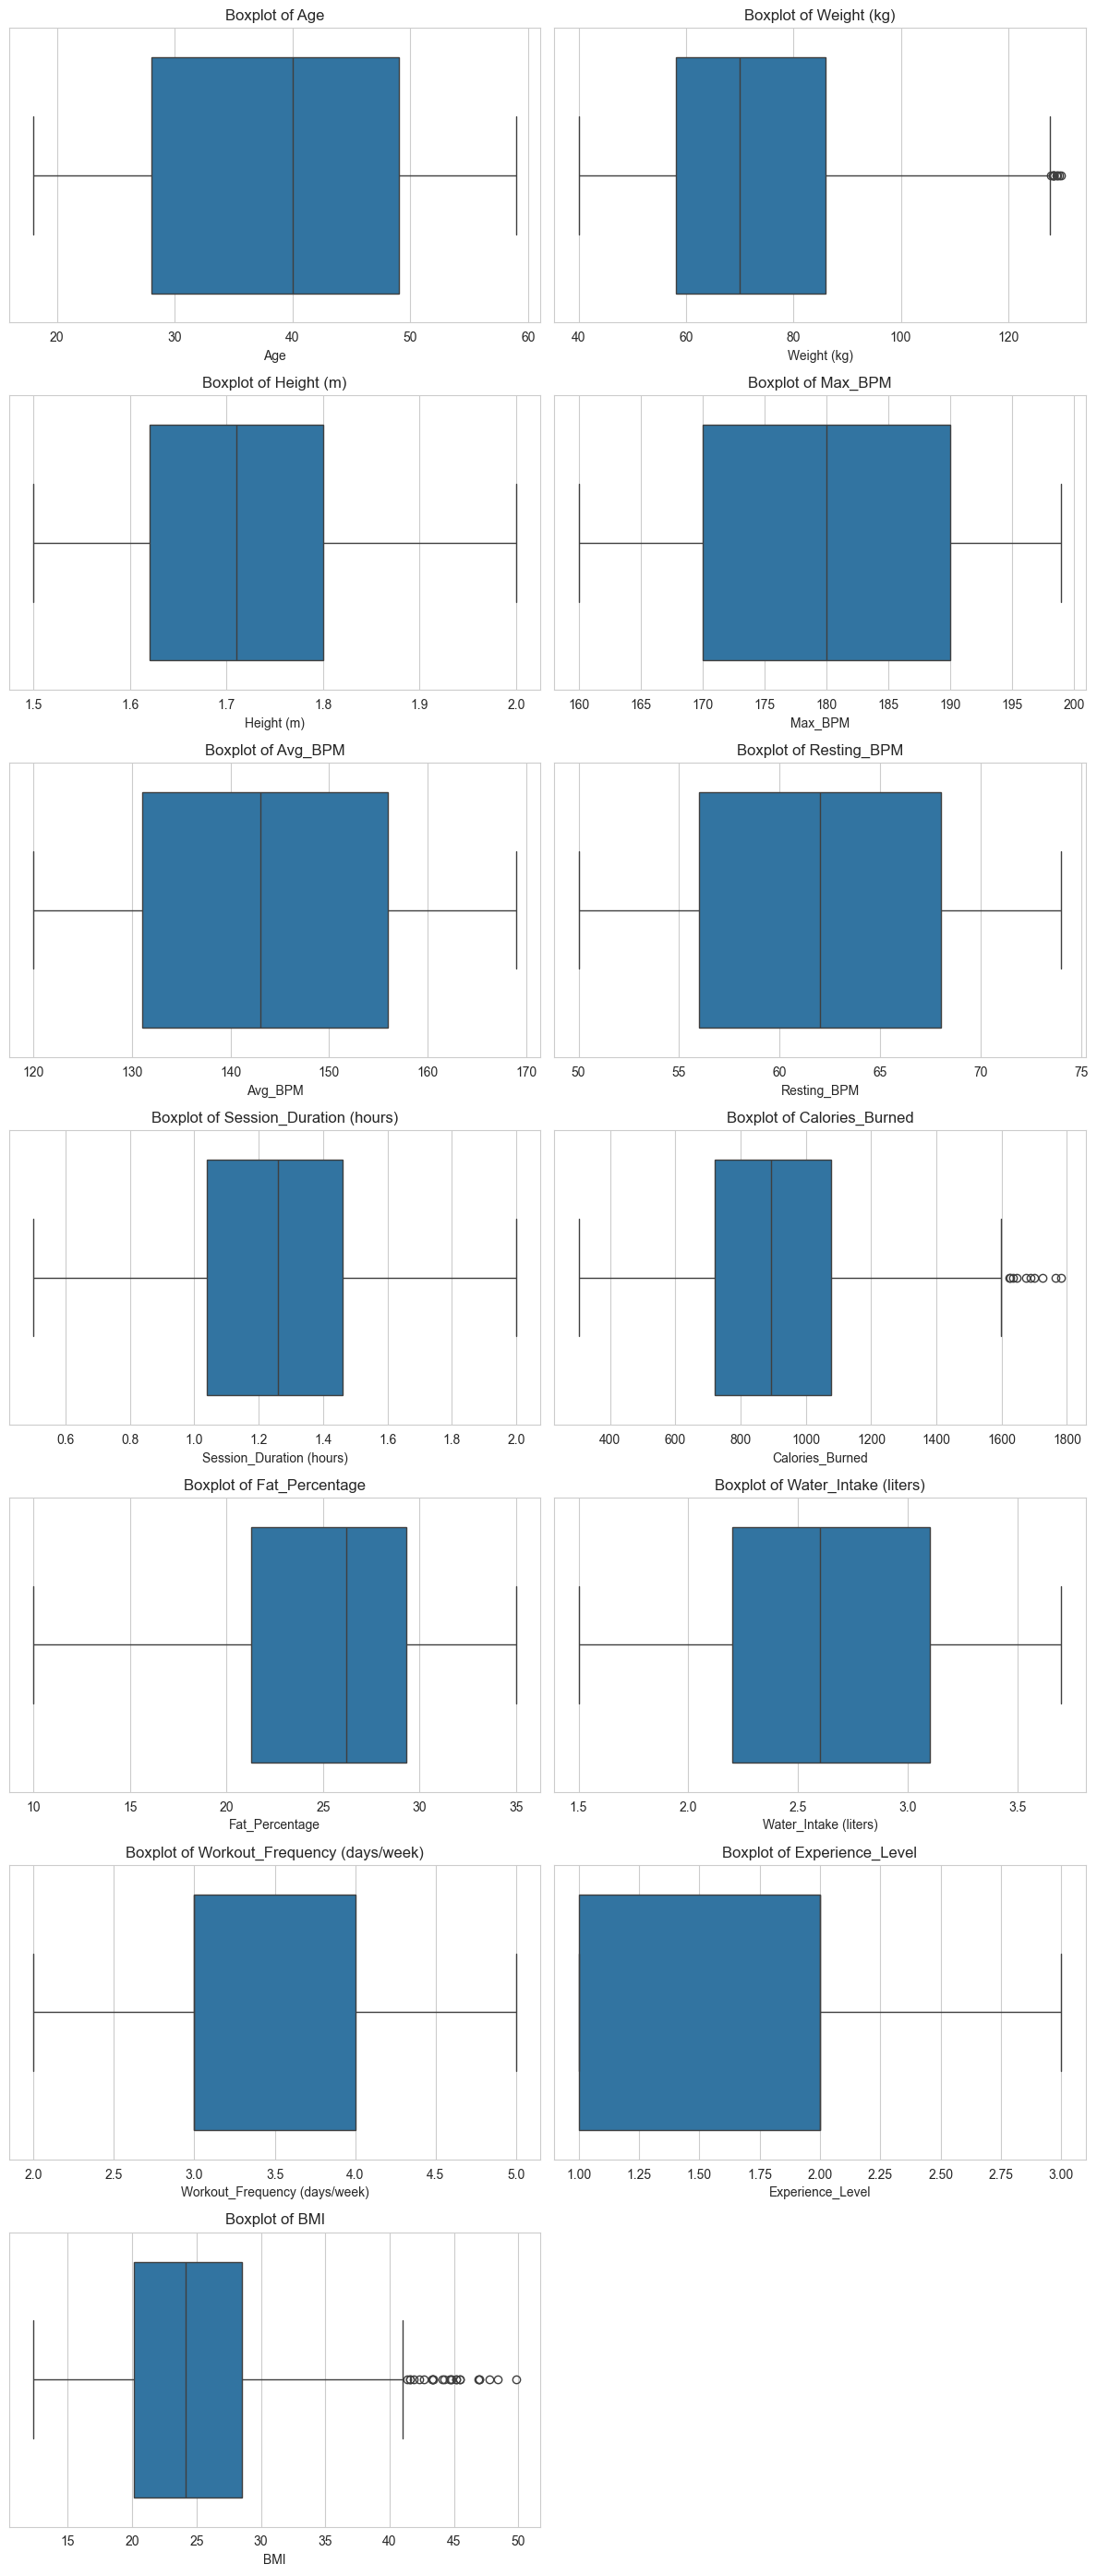

In [10]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_cols_per_row = 2  # Number of box plots per row
n_rows = int(np.ceil(len(numeric_cols) / n_cols_per_row))

plt.figure(figsize=(6 * n_cols_per_row, 4 * n_rows))  # Adjust figure size accordingly

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols_per_row, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


# Dimensions before and after outlier removal

In [11]:

# 3 columns with outliers
outlier_cols = ['Weight (kg)', 'Calories_Burned', 'BMI']

# Function to remove outliers using IQR
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Backup original row count
original_shape = df.shape

# Remove outliers column by column
for col in outlier_cols:
    df = remove_outliers_iqr(df, col)

# Final shape after removal
final_shape = df.shape

print(f"Original data shape: {original_shape}")
print(f"After removing outliers: {final_shape}")


Original data shape: (973, 15)
After removing outliers: (931, 15)


 # Calorie Prediction using Linear Regression
 Finding relevant features with nature of linearity

Top 3 features affecting Calories Burned: ['session_duration_hours', 'avg_bpm', 'Age']


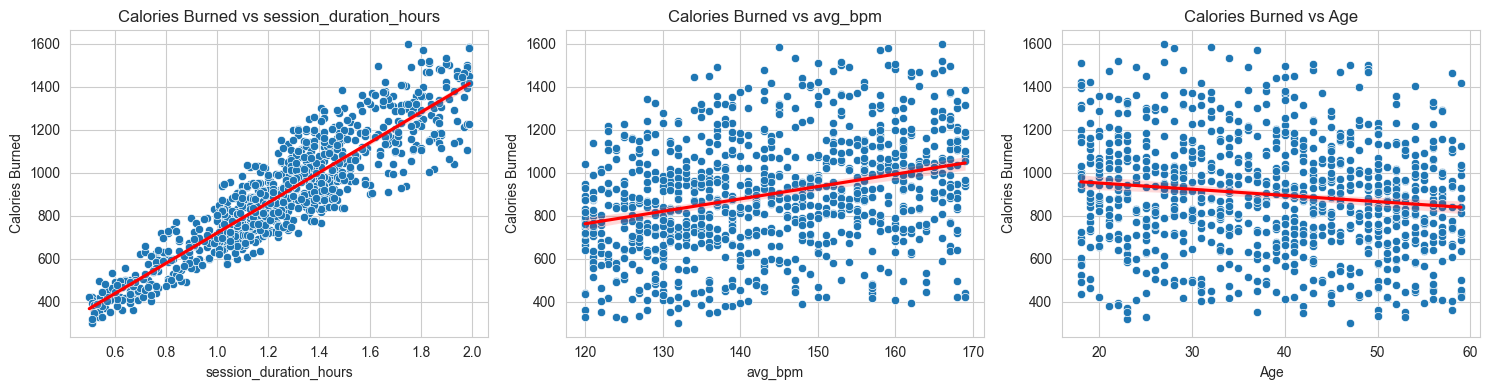

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming df is already loaded with the correct columns
# Rename columns for easier access
df.rename(columns={
    'Weight (kg)': 'weight_kg',
    'Height (m)': 'height_m',
    'Session_Duration (hours)': 'session_duration_hours',
    'Calories_Burned': 'calories_burned',
    'Workout_Type': 'workout_type',
    'Water_Intake (liters)': 'water_intake_liters',
    'Workout_Frequency (days/week)': 'workout_frequency_days_week',
    'Experience_Level': 'experience_level',
    'Fat_Percentage': 'fat_percentage',
    'Max_BPM': 'max_bpm',
    'Avg_BPM': 'avg_bpm',
    'Resting_BPM': 'resting_bpm',
    'BMI': 'bmi'
}, inplace=True)

# Define features and target
features = [
    'Age', 'Gender', 'weight_kg', 'height_m', 'max_bpm', 'avg_bpm', 'resting_bpm',
    'session_duration_hours', 'workout_type', 'fat_percentage', 'water_intake_liters',
    'workout_frequency_days_week', 'experience_level', 'bmi'
]
target = 'calories_burned'

X = df[features]
y = df[target]

# Separate categorical and numerical features
categorical_cols = ['Gender', 'workout_type', 'experience_level']
numerical_cols = [col for col in features if col not in categorical_cols]

# Preprocess
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])

X_processed = preprocessor.fit_transform(X)

# Fit linear regression
lr = LinearRegression()
lr.fit(X_processed, y)

# Get feature names after OneHotEncoding
ohe = preprocessor.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(ohe_feature_names)

# Get absolute coefficient values for importance
coef_abs = np.abs(lr.coef_)

# Create DataFrame for feature importance
feat_imp_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': coef_abs
}).sort_values(by='importance', ascending=False)

top3_features = feat_imp_df.head(3)['feature'].tolist()
print("Top 3 features affecting Calories Burned:", top3_features)

# Visualize relationship of top 3 features with calories burned
plt.figure(figsize=(15, 4))

for i, feat in enumerate(top3_features):
    plt.subplot(1, 3, i + 1)
    # Check if feature is categorical (has _ in it from OneHotEncoder)
    if '_' in feat and any(cat in feat for cat in categorical_cols):
        # Extract base feature and category value
        base_feat = feat.split('_')[0]
        cat_value = '_'.join(feat.split('_')[1:])
        sns.boxplot(x=X[base_feat] == cat_value, y=y)
        plt.xlabel(f'{base_feat} == {cat_value}')
        plt.title(f'Calories Burned by {base_feat} category')
    else:
        # Numerical feature - scatter plot with regression line
        sns.scatterplot(x=X[feat], y=y)
        sns.regplot(x=X[feat], y=y, scatter=False, color='red')
        plt.xlabel(feat)
        plt.ylabel('Calories Burned')
        plt.title(f'Calories Burned vs {feat}')

plt.tight_layout()
plt.show()


# Implementing Linear Regression Model

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame already loaded

# Define feature and target
X = df[['session_duration_hours']]  # single feature as 2D dataframe
y = df['calories_burned']

# outlier treatment for y (same as your original if you want)
upper_percentile = 0.99
lower_percentile = 0.01
lower_bound_y = y.quantile(lower_percentile)
upper_bound_y = y.quantile(upper_percentile)
y = np.clip(y, a_min=lower_bound_y, a_max=upper_bound_y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train linear regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Test Loss (MSE): {mse:.2f}")
print(f"Linear Regression Test MAE: {mae:.2f}")
print(f"Linear Regression Test RMSE: {rmse:.2f}")
print(f"Linear Regression Test R²: {r2:.4f}")

Linear Regression Test Loss (MSE): 12768.18
Linear Regression Test MAE: 91.29
Linear Regression Test RMSE: 113.00
Linear Regression Test R²: 0.8238


# Visualization of Actual and predicted Values in Linear Regression Model

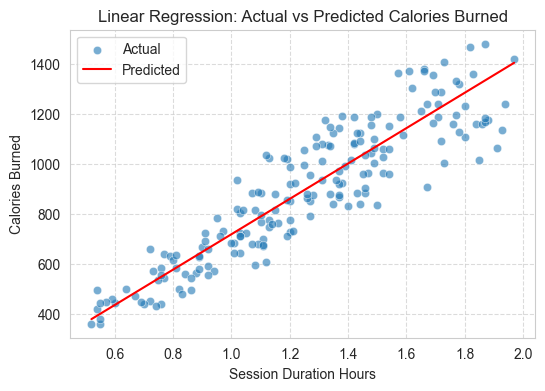

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['session_duration_hours'], y=y_test, alpha=0.6, label='Actual')
sns.lineplot(x=X_test['session_duration_hours'], y=y_pred, color='red', label='Predicted')
plt.xlabel('Session Duration Hours')
plt.ylabel('Calories Burned')
plt.title('Linear Regression: Actual vs Predicted Calories Burned')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Evaluation metrics and top 5 features for random forest

Random Forest Train MSE: 285.97
Random Forest Test MSE: 2123.32
Random Forest Train MAE: 13.32
Random Forest Test MAE: 36.10
Random Forest Train R²: 0.9959 (99.59%)
Random Forest Test R²: 0.9740 (97.40%)


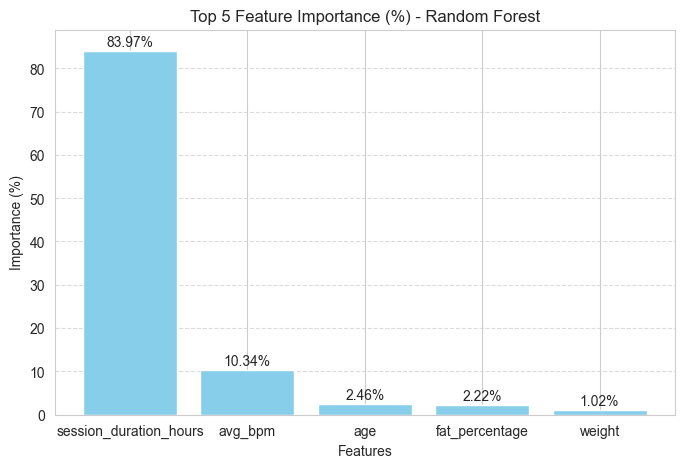

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("gym.csv")

# Rename columns to snake_case (if not done yet)
df.rename(columns={
    'Age': 'age',
    'Gender': 'gender',
    'Weight (kg)': 'weight',
    'Height (m)': 'height_m',
    'Max_BPM': 'max_bpm',
    'Avg_BPM': 'avg_bpm',
    'Resting_BPM': 'resting_bpm',
    'Session_Duration (hours)': 'session_duration_hours',
    'Calories_Burned': 'calories_burned',
    'Workout_Type': 'workout_type',
    'Fat_Percentage': 'fat_percentage',
    'Water_Intake (liters)': 'water_intake_liters',
    'Workout_Frequency (days/week)': 'workout_frequency_days/week',
    'Experience_Level': 'experience_level',
    'BMI': 'bmi'
}, inplace=True)

# Define features & target
# We want to use **only the top 5 features** here, replace with your top 5 features
top_5_features = ['session_duration_hours', 'avg_bpm', 'fat_percentage', 'weight', 'age']
X = df[top_5_features]
y = df['calories_burned']

# Outlier treatment on target variable
lower_bound_y = y.quantile(0.01)
upper_bound_y = y.quantile(0.99)
y = np.clip(y, a_min=lower_bound_y, a_max=upper_bound_y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

# Calculate metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Random Forest Train MSE: {mse_train:.2f}")
print(f"Random Forest Test MSE: {mse_test:.2f}")
print(f"Random Forest Train MAE: {mae_train:.2f}")
print(f"Random Forest Test MAE: {mae_test:.2f}")
print(f"Random Forest Train R²: {r2_train:.4f} ({r2_train * 100:.2f}%)")
print(f"Random Forest Test R²: {r2_test:.4f} ({r2_test * 100:.2f}%)")

# Feature importance
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': top_5_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Convert importance to percentage
feature_importance_df['Importance_pct'] = feature_importance_df['Importance'] * 100

# Plotting feature importance bar plot with percentage labels
plt.figure(figsize=(8, 5))
bars = plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance_pct'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Top 5 Feature Importance (%) - Random Forest')
plt.ylabel('Importance (%)')
plt.xlabel('Features')
plt.ylim(0, feature_importance_df['Importance_pct'].max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualization of Random Forest's actual vs predicted values

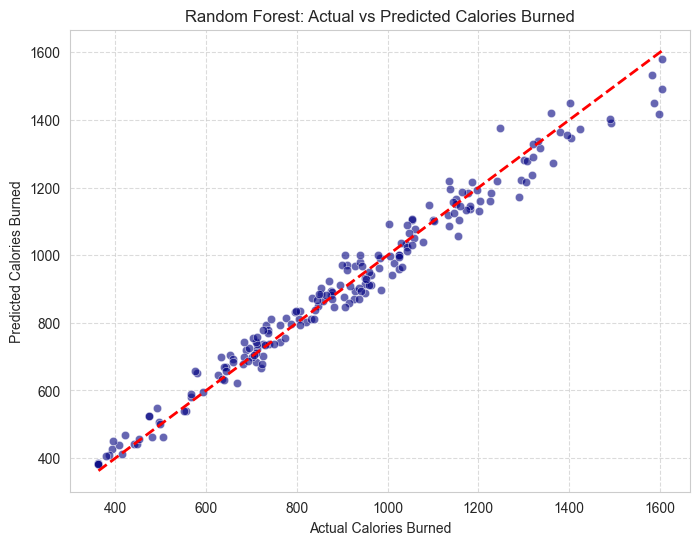

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred_rf are defined from your Random Forest model

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6, color='navy')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Random Forest: Actual vs Predicted Calories Burned')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Calories Prediction using XG Boost Regressor Model

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# --- Load and clean ---
df = pd.read_csv("gym.csv")
df.rename(columns={
    'Age': 'age',
    'Gender': 'gender',
    'Weight (kg)': 'weight',
    'Height (m)': 'height_m',
    'Max_BPM': 'max_bpm',
    'Avg_BPM': 'avg_bpm',
    'Resting_BPM': 'resting_bpm',
    'Session_Duration (hours)': 'session_duration_hours',
    'Calories_Burned': 'calories_burned',
    'Workout_Type': 'workout_type',
    'Fat_Percentage': 'fat_percentage',
    'Water_Intake (liters)': 'water_intake_liters',
    'Workout_Frequency (days/week)': 'workout_frequency_days_week',
    'Experience_Level': 'experience_level',
    'BMI': 'bmi'
}, inplace=True)

# Outlier treatment on target variable
df['calories_burned'] = np.clip(
    df['calories_burned'],
    df['calories_burned'].quantile(0.01),
    df['calories_burned'].quantile(0.99)
)

# --- Metrics printer ---
def print_metrics(y_true, y_pred, label):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MSE: {mse:.2f}")
    print(f"{label} MAE: {mae:.2f}")
    print(f"{label} R²: {r2:.4f} ({r2*100:.2f}%)\n")

# ========== XGBoost Model ==========
features = [
    'session_duration_hours', 'avg_bpm', 'fat_percentage',
    'workout_frequency_days_week', 'gender', 'experience_level'
]

X = df[features]
y = df['calories_burned']

# Apply ColumnTransformer for scaling and encoding categorical columns
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), ['session_duration_hours', 'avg_bpm', 'fat_percentage', 'workout_frequency_days_week']),
    ('cat', OneHotEncoder(drop='first'), ['gender', 'experience_level'])
])

X_scaled = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# XGBoost Model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)

xg_model.fit(X_train, y_train)

y_pred_xgb = xg_model.predict(X_test)

print("=== XGBoost Regressor ===")
print_metrics(y_test, y_pred_xgb, "Test")

=== XGBoost Regressor ===
Test MSE: 3796.41
Test MAE: 51.35
Test R²: 0.9535 (95.35%)



# Visualization of XG Boost Regressor model Actual and Predicted values

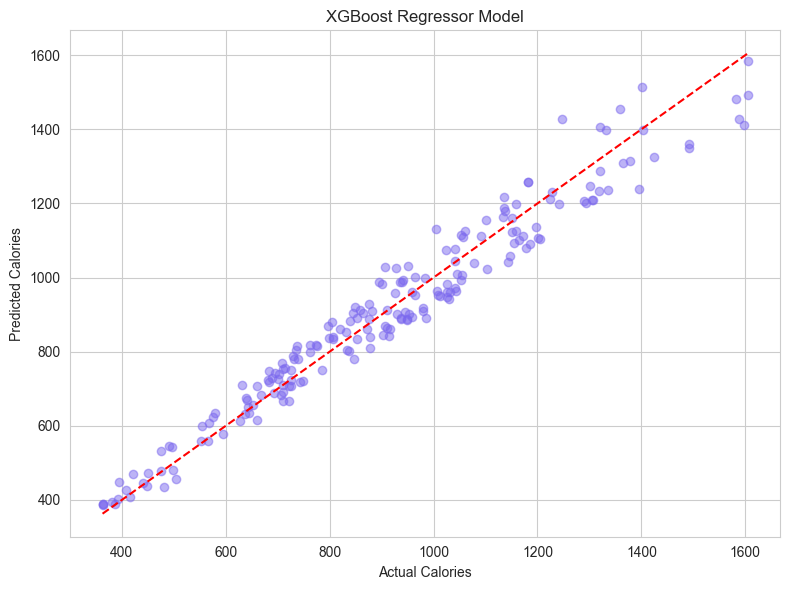

In [18]:
# XGBoost Model Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='mediumslateblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("XGBoost Regressor Model")
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calorie Prediction Using Neural Networks

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- Load and clean ---
df = pd.read_csv("gym.csv")
df.rename(columns={
    'Age': 'age',
    'Gender': 'gender',
    'Weight (kg)': 'weight',
    'Height (m)': 'height_m',
    'Max_BPM': 'max_bpm',
    'Avg_BPM': 'avg_bpm',
    'Resting_BPM': 'resting_bpm',
    'Session_Duration (hours)': 'session_duration_hours',
    'Calories_Burned': 'calories_burned',
    'Workout_Type': 'workout_type',
    'Fat_Percentage': 'fat_percentage',
    'Water_Intake (liters)': 'water_intake_liters',
    'Workout_Frequency (days/week)': 'workout_frequency_days_week',
    'Experience_Level': 'experience_level',
    'BMI': 'bmi'
}, inplace=True)

# Outlier treatment on target variable
df['calories_burned'] = np.clip(
    df['calories_burned'],
    df['calories_burned'].quantile(0.01),
    df['calories_burned'].quantile(0.99)
)

# --- Metrics printer ---
def print_metrics(y_true, y_pred, label):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MSE: {mse:.2f}")
    print(f"{label} MAE: {mae:.2f}")
    print(f"{label} R²: {r2:.4f} ({r2*100:.2f}%)\n")

# ========== PHASE 1: Okay Model ==========
features_phase1 = ['session_duration_hours', 'avg_bpm', 'fat_percentage']
X1 = df[features_phase1]
y = df['calories_burned']

X1_scaled = StandardScaler().fit_transform(X1)
X1_train, X1_test, y_train, y_test = train_test_split(X1_scaled, y, test_size=0.2, random_state=42)

model_phase1 = Sequential([
    Dense(32, activation='relu', input_shape=(X1_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])
model_phase1.compile(optimizer=Adam(learning_rate=0.005), loss='mse')

model_phase1.fit(X1_train, y_train, epochs=20, batch_size=32, verbose=0)

y_pred1 = model_phase1.predict(X1_test).flatten()

print("\n=== Phase 1: Before Hyperparameter Tuning ===")
print_metrics(y_test, y_pred1, "Test")


# ========== PHASE 2: Tuned Strong Model ==========
features_phase2 = [
    'session_duration_hours', 'avg_bpm', 'fat_percentage',
    'workout_frequency_days_week', 'gender', 'experience_level'
]

X2 = df[features_phase2]
preprocessor2 = ColumnTransformer([
    ('num', StandardScaler(), ['session_duration_hours', 'avg_bpm', 'fat_percentage', 'workout_frequency_days_week']),
    ('cat', OneHotEncoder(drop='first'), ['gender', 'experience_level'])
])
X2_scaled = preprocessor2.fit_transform(X2)
X2_train, X2_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)

model_phase2 = Sequential([
    Dense(64, activation='relu', input_shape=(X2_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
model_phase2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_phase2.fit(X2_train, y_train, epochs=150, batch_size=32, validation_split=0.2,
                 callbacks=[early_stop], verbose=0)

y_pred2 = model_phase2.predict(X2_test).flatten()

print("=== ✅ Phase 2: After Hyperparameter Tuning ===")
print_metrics(y_test, y_pred2, "Test")


/Users/umeshbanoth/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

=== Phase 1: Before Hyperparameter Tuning ===
Test MSE: 6751.53
Test MAE: 67.33
Test R²: 0.9173 (91.73%)



/Users/umeshbanoth/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
=== ✅ Phase 2: After Hyperparameter Tuning ===
Test MSE: 4350.19
Test MAE: 55.66
Test R²: 0.9467 (94.67%)



# Visualization of Neural Network's Actual and Predicted values

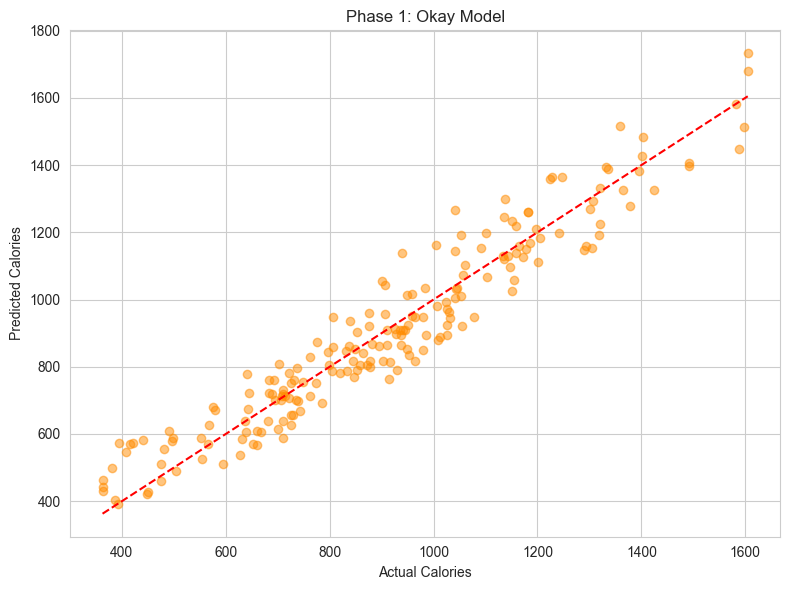

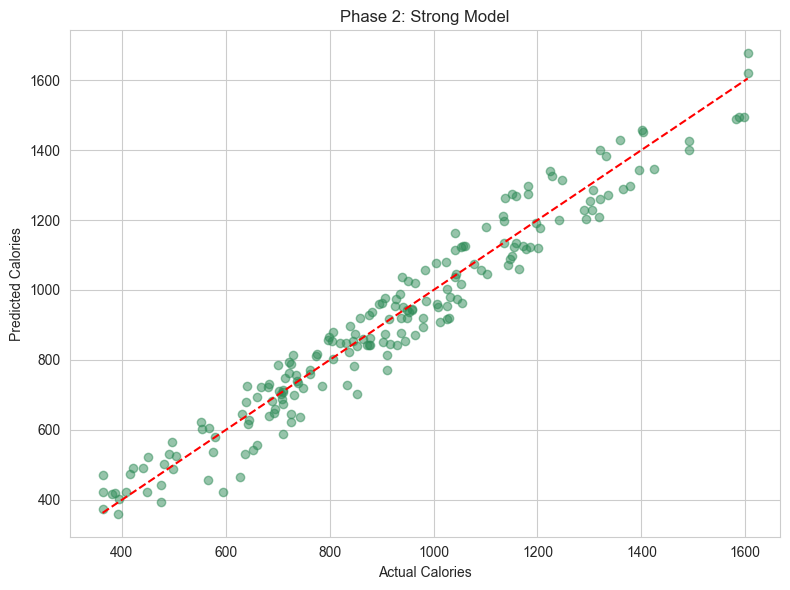

In [20]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred1, alpha=0.5, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Phase 1: Okay Model")
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred2, alpha=0.5, color='seagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Phase 2: Strong Model")
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.grid(True)
plt.tight_layout()
plt.show()

# Health Risk Cluster and Preventive Measures
Visualization of clustering analysis using elbow method and silhouette scores to determine the optimal number of clusters


Silhouette Score for k=2: 0.2464
Silhouette Score for k=3: 0.1858
Silhouette Score for k=4: 0.1485
Silhouette Score for k=5: 0.1324
Silhouette Score for k=6: 0.1313
Silhouette Score for k=7: 0.1316
Silhouette Score for k=8: 0.1293
Silhouette Score for k=9: 0.1265
Silhouette Score for k=10: 0.1249


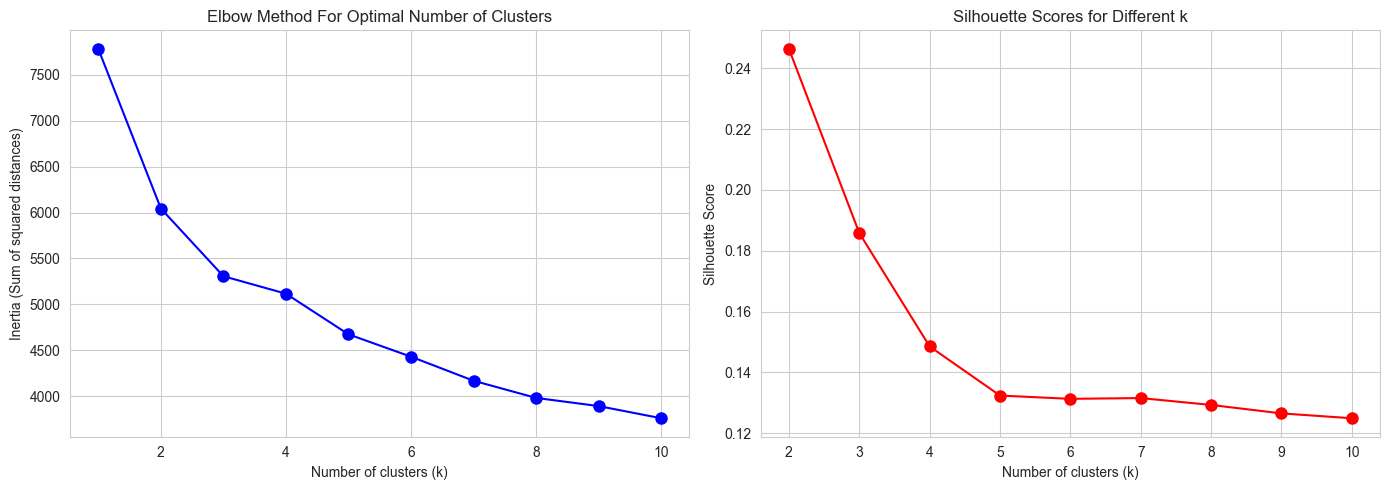

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load and rename columns
df = pd.read_csv('gym.csv')
df.rename(columns={
    'Avg_BPM': 'avg_bpm',
    'Max_BPM': 'max_bpm',
    'Resting_BPM': 'resting_bpm',
    'BMI': 'bmi',
    'Fat_Percentage': 'fat_percentage',
    'Water_Intake (liters)': 'water_intake_liters',
    'Workout_Frequency (days/week)': 'workout_frequency_days_week',
    'Session_Duration (hours)': 'session_duration_hours'
}, inplace=True)

# Select features
features = [
    'avg_bpm', 'max_bpm', 'resting_bpm', 'bmi',
    'fat_percentage', 'water_intake_liters',
    'workout_frequency_days_week', 'session_duration_hours'
]
X = df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize lists to store metrics
inertia = []
sil_scores = []

k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

    # Silhouette score only for k >= 2
    if k > 1:
        labels = km.labels_
        sil = silhouette_score(X_scaled, labels)
        sil_scores.append(sil)
        print(f"Silhouette Score for k={k}: {sil:.4f}")

# Plot both metrics side by side
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), sil_scores, 'ro-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid(True)

plt.tight_layout()
plt.show()



# Cluster Visualization

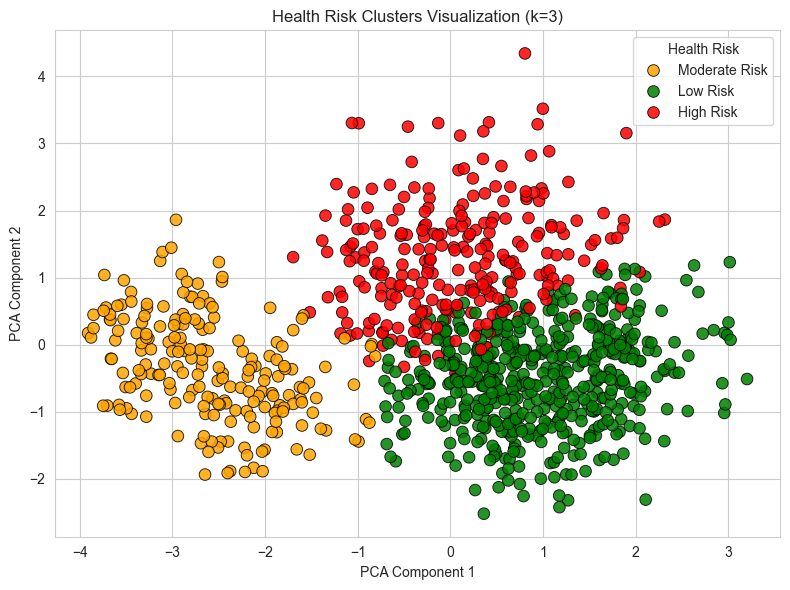

In [22]:
from sklearn.decomposition import PCA
import seaborn as sns

# --- 1. Choose Optimal k ---
optimal_k = 3  # 👈 Based on your silhouette or elbow method results, update this if needed

# --- 2. Refit KMeans using optimal k ---
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = final_kmeans.fit_predict(X_scaled)

# --- 3. Map cluster numbers to health risk labels (manual mapping) ---
# Manually inspect the centroids or visualize to map accurately
health_risk_labels = {
    0: 'Moderate Risk',
    1: 'Low Risk',
    2: 'High Risk'
}

# --- 4. Assign readable labels and colors ---
df['health_risk'] = df['cluster'].map(health_risk_labels)
health_risk_colors = {
    'Low Risk': 'green',
    'Moderate Risk': 'orange',
    'High Risk': 'red'
}

# --- 5. Reduce to 2D for visualization (PCA) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- 6. Plot Clusters with Health Risk Labels ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=df['health_risk'],
    palette=health_risk_colors,
    s=70, alpha=0.85, edgecolor="black"
)

plt.title(f'Health Risk Clusters Visualization (k={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Health Risk')
plt.grid(True)
plt.tight_layout()
plt.show()


## Result Statement:
Among all evaluated models, the **Random Forest Regressor** achieved the best performance with an R² score of **97.4%**, indicating high predictive accuracy for estimating calories burned during exercise. The model outperformed other approaches (including Linear Regression, XGBoost, and Neural Networks) across all evaluated metrics. Additionally, key features influencing calorie prediction were identified, and clustering techniques successfully segmented individuals into health risk groups. These results demonstrate the effectiveness of machine learning for both accurate calorie estimation and health risk categorization in fitness applications.


# Contribution:
1. Umeshkumar Banoth: Implemented linear regression and random forest models
2. Gauri Gajanan Badwe: Implemented XGBoost Regressor and Neural Network models  
3. Sai Mahanth Nandipi: Performed EDA and K-means Clustering analysis
4. Sankara Vamsi Raju Sarikonda: Created visualizations for all models
